# **KÄ±z BaÅŸÄ±na Veri Analizi Bootcamp 1. Bitirme Projesi**

## **AmaÃ§:**
3 haftalÄ±k bu proje kapsamÄ±nda katÄ±lÄ±mcÄ±larÄ±n, gerÃ§ek bir veri seti kullanarak istatistiksel analiz, eksik veri incelemesi, aykÄ±rÄ± deÄŸer tespiti ve gÃ¶rselleÅŸtirme adÄ±mlarÄ±nÄ± uygulayarak veri analizi becerilerini geliÅŸtirmeleri hedeflenmektedir.

## **Senaryo:**
KatÄ±lÄ±mcÄ±lar, aÅŸaÄŸÄ±da belirtilen iki veri setinden birini seÃ§erek veri analizi sÃ¼recini yÃ¼rÃ¼tÃ¼r. Bu analiz sÃ¼recinde sayÄ±sal ve kategorik deÄŸiÅŸkenler Ã¼zerinde uygun grafiklerle gÃ¶rselleÅŸtirme yapÄ±lÄ±r, eksik deÄŸerler ve aykÄ±rÄ± veriler analiz edilir ve istatistiksel Ã¶zetler oluÅŸturulur.

Veri setlerinden biri ÅŸu ÅŸekilde seÃ§ilmelidir:

-  Dataset 1: Airline Passenger Satisfaction Dataset
-  Dataset 2: Customer Experience Dataset

## **Proje Gereklilikleri**

### **1. Veri Seti SeÃ§imi KatÄ±lÄ±mcÄ±, yukarÄ±daki iki veri setinden birini seÃ§erek analiz Ã§alÄ±ÅŸmalarÄ±na baÅŸlar.**


SeÃ§ilen Dataset : Airline Passenger Satisfaction

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv

In [4]:
# Gerekli kÃ¼tÃ¼phaneleri import edelim
import pandas as pd       # Pandas: Verinin analizi iÃ§in gerekli 
import numpy as np        # Numpy: Matematiksel iÅŸlemler iÃ§in gerekli bir kÃ¼tÃ¼phanedir.

# GÃ¶rselleÅŸtirme iÃ§in gerekli kÃ¼tÃ¼phaneleri import edelim
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno       # eksik verilerin gÃ¶rselleÅŸtirilmesi iÃ§in gerekli bir kÃ¼tÃ¼phane

In [5]:
# Veri setimizi import edelim

df = pd.read_csv("airline_train.csv")

In [6]:
# Veri setinin ilk 5 satÄ±rÄ±nÄ± gÃ¶rÃ¼ntÃ¼leyelim

df.head()          # parantez iÃ§erisine hiÃ§bir deÄŸer girilmezse default deÄŸeri 5'tir.

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [7]:
# Veri setinin son 5 satÄ±rÄ±nÄ± gÃ¶rÃ¼ntÃ¼leyelim.

df.tail()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
103899      103899  94171  Female  disloyal Customer   23  Business travel   
103900      103900  73097    Male     Loyal Customer   49  Business travel   
103901      103901  68825    Male  disloyal Customer   30  Business travel   
103902      103902  54173  Female  disloyal Customer   22  Business travel   
103903      103903  62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
103899                 3            2                           3   
103900                 5            4                           0   
103901                 5            4                           7   
103902                 4            1                           0   
103903                 3            1                           0   

        Arrival Delay in Minutes             satisfaction  
103899                       0.0  neutral or dissatisfied  
103900                       0.0                satisfied  
103901                      14.0  neutral or dissatisfied  
103902                       0.0  neutral or dissatisfied  
103903                       0.0  neutral or dissatisfied  

[5 rows x 25 columns]

In [8]:
# Verinin deÄŸiÅŸkenlerini/ attributelarÄ±nÄ± getirelim.

df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### ColumnlarÄ± aÃ§Ä±klayalÄ±m:

- **Unnamed: 0**: Index deÄŸerleri tutmaktadÄ±r. (Model kurulacaÄŸÄ± zaman bu sÃ¼tunun modele doÄŸrudan etkisi olmadÄ±ÄŸÄ± iÃ§in kaldÄ±rÄ±labilir.)
- **id** : YolcularÄ±n id numaralarÄ±dÄ±r.
- **Gender** : YolcularÄ±n cinsiyeti (KadÄ±n, Erkek)
- **Customer Type** : MÃ¼ÅŸteri tipi (SadÄ±k mÃ¼ÅŸteri (Loyal Customer), SadÄ±k olmayan mÃ¼ÅŸteri(disloyel Customer))
- **Age** : YolcularÄ±n gerÃ§ek yaÅŸÄ±
- **Type of Travel** : UÃ§uÅŸ amacÄ± (KiÅŸisel seyahat (Personal Travel), Ä°ÅŸ seyahati(Business travel))
- **Class** : UÃ§ak iÃ§i seyahat sÄ±nÄ±fÄ± (Business, Ekonomi (Eco) , Ekonomi Plus (Eco Plus))
- **Flight Distance** : Bu yolculuÄŸun uÃ§uÅŸ mesafesi
- **Inflight wifi service** : UÃ§ak iÃ§i Wi-Fi hizmetinden memnuniyet dÃ¼zeyi (0, 1, 2, 3, 4, 5)
- **Departure/Arrival time convenient** : KalkÄ±ÅŸ/VarÄ±ÅŸ saatlerinin uygunluÄŸu memnuniyeti (0, 1, 2, 3, 4, 5)
- **Ease of Online booking** : Online rezervasyon kolaylÄ±ÄŸÄ± memnuniyeti (0, 1, 2, 3, 4, 5)
- **Gate location** : KapÄ± konumu memnuniyeti  (0, 1, 2, 3, 4, 5)
- **Food and drink** : Yiyecek ve iÃ§ecek hizmeti memnuniyeti (0, 1, 2, 3, 4, 5)
- **Online boarding** : Online biniÅŸ memnuniyeti (0, 1, 2, 3, 4, 5)
- **Seat comfort** : Koltuk konforu memnuniyeti (0, 1, 2, 3, 4, 5)
- **Inflight entertainment**: UÃ§ak iÃ§i eÄŸlence hizmeti memnuniyeti (0, 1, 2, 3, 4, 5)
- **On-board service** : UÃ§ak iÃ§i genel hizmet memnuniyeti (0, 1, 2, 3, 4, 5)
- **Leg room service** : Bacak mesafesi hizmeti memnuniyeti (0, 1, 2, 3, 4, 5)
- **Baggage handling** : Bagaj hizmeti memnuniyeti (1, 2, 3, 4, 5)
- **Checkin service** : Check-in (kayÄ±t) hizmeti memnuniyeti (0, 1, 2, 3, 4, 5)
- **Inflight service** : UÃ§uÅŸ sÄ±rasÄ±ndaki hizmet memnuniyeti (0, 1, 2, 3, 4, 5)
- **Cleanliness** : Temizlik memnuniyeti (0, 1, 2, 3, 4, 5)
- **Departure Delay in Minutes** : KalkÄ±ÅŸtaki gecikme sÃ¼resi (dakika cinsinden)
- **Arrival Delay in Minutes** : VarÄ±ÅŸtaki gecikme sÃ¼resi (dakika cinsinden)
- **Satisfaction** : Havayolu memnuniyet dÃ¼zeyi (Memnun (satisfied), NÃ¶tr ya da Memnun deÄŸil (neutral or dissatisfied))

In [10]:
# Verinin kaÃ§ satÄ±r ve kaÃ§ sÃ¼tundan oluÅŸtuÄŸunu yazdÄ±ralÄ±m

df.shape

(103904, 25)

**Verimiz 103904 satÄ±r ve 25 sÃ¼tundan oluÅŸmaktadÄ±r.**

In [11]:
# Verinin index bilgilerine eriÅŸelim

df.index

RangeIndex(start=0, stop=103904, step=1)

In [12]:
# Her bir deÄŸiÅŸkenin deÄŸiÅŸken tipini getirelim.

df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [13]:
# Veri hakkÄ±nda daha detaylÄ± bilgi edinelim

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

#### YorumlayalÄ±m:

- 103904 toplam gÃ¶zlem sayÄ±sÄ±dÄ±r.

- Verimiz 24 feature iÃ§ermektedir.

- 1 float64 tipinde, 5 objects tipinde , 19 int64 tipinde verimiz bulunur.

- Verimizde eksik deÄŸerler bulunmaktadÄ±r. Ä°lk izlenime gÃ¶re Arrival Delay in Minutes sÃ¼tununda eksik deÄŸer bulunmaktadÄ±r. Ä°leride detaylÄ±ca bu kÄ±sÄ±ma deÄŸinilecektir.

### Veri setinin Ã§erÃ§evesindeki sÃ¼tunlarÄ± veri tÃ¼rlerine gÃ¶re ayÄ±ralÄ±m.
### Kategorik sÃ¼tunlarÄ± cat_cols listesine, sayÄ±sal sÃ¼tunlarÄ± num_cols listesine yerleÅŸtirelim.

In [14]:
cat_cols = []                      # kategorik sÃ¼Ã¼tunlarÄ± tutar
num_cols = []                      # numeric sÃ¼tunlarÄ± tutar.
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object"]]   # deÄŸiÅŸken tipi category veya object ise cat_cols'a ekleyelim
num_cols = [col for col in df.columns if df[col].dtypes in ["int64","float64"]]      # deÄŸiÅŸken tipi category veya object ise num_cols'a ekleyelim

In [15]:
cat_cols, num_cols

(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'],
 ['Unnamed: 0',
  'id',
  'Age',
  'Flight Distance',
  'Inflight wifi service',
  'Departure/Arrival time convenient',
  'Ease of Online booking',
  'Gate location',
  'Food and drink',
  'Online boarding',
  'Seat comfort',
  'Inflight entertainment',
  'On-board service',
  'Leg room service',
  'Baggage handling',
  'Checkin service',
  'Inflight service',
  'Cleanliness',
  'Departure Delay in Minutes',
  'Arrival Delay in Minutes'])

### **2. Ä°statistiksel Ã–zet Veri setindeki deÄŸiÅŸkenlere dair merkezi eÄŸilim (ortalama, medyan vb.) ve daÄŸÄ±lÄ±m (standart sapma, minimum, maksimum vb.) istatistikleri raporlanÄ±r.**


In [16]:
# Verinin istatistiksel 

df.describe()

Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           103904.000000  103904.000000   103904.000000    103904.000000   
mean                 2.756901       2.976883        3.202129         3.250375   
std                  1.398929       1.277621        1.329533         1.349509   
min                  0.000000       0.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

        Seat comfort  Inflight entertainment  On-board service  \
count  103904.000000           103904.000000     103904.000000   
mean        3.439396                3.358158          3.382363   
std         1.319088                1.332991          1.288354   
min         0.000000                0.000000          0.000000   
25%         2.000000                2.000000          2.000000   
50%         4.000000                4.000000          4.000000   
75%         5.000000                4.000000          4.000000   
max         5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     103904.000000     103904.000000    103904.000000     103904.000000   
mean           3.351055          3.631833         3.304290          3.640428   
std            1.315605          1.180903         1.265396          1.175663   
min            0.000000          1.000000         0.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

         Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
count  103904.000000               103904.000000             103594.000000  
mean        3.286351                   14.815618                 15.178678  
std         1.312273                   38.230901                 38.698682  
min         0.000000                    0.000000                  0.000000  
25%         2.000000                    0.000000                  0.000000  
50%         3.000000                    0.000000                  0.000000  
75%         4.000000                   12.000000                 13.000000  
max         5.000000                 1592.000000               1584.000000

In [17]:
# Transpozunu alalÄ±m. (YukarÄ±daki formattan ziyade bu ÅŸekilde okumak ve yorumlamak daha kolay hale geliyor.)

df.describe().T

count          mean           std   min  \
Unnamed: 0                         103904.0  51951.500000  29994.645522   0.0   
id                                 103904.0  64924.210502  37463.812252   1.0   
Age                                103904.0     39.379706     15.114964   7.0   
Flight Distance                    103904.0   1189.448375    997.147281  31.0   
Inflight wifi service              103904.0      2.729683      1.327829   0.0   
Departure/Arrival time convenient  103904.0      3.060296      1.525075   0.0   
Ease of Online booking             103904.0      2.756901      1.398929   0.0   
Gate location                      103904.0      2.976883      1.277621   0.0   
Food and drink                     103904.0      3.202129      1.329533   0.0   
Online boarding                    103904.0      3.250375      1.349509   0.0   
Seat comfort                       103904.0      3.439396      1.319088   0.0   
Inflight entertainment             103904.0      3.358158      1.332991   0.0   
On-board service                   103904.0      3.382363      1.288354   0.0   
Leg room service                   103904.0      3.351055      1.315605   0.0   
Baggage handling                   103904.0      3.631833      1.180903   1.0   
Checkin service                    103904.0      3.304290      1.265396   0.0   
Inflight service                   103904.0      3.640428      1.175663   0.0   
Cleanliness                        103904.0      3.286351      1.312273   0.0   
Departure Delay in Minutes         103904.0     14.815618     38.230901   0.0   
Arrival Delay in Minutes           103594.0     15.178678     38.698682   0.0   

                                        25%      50%       75%       max  
Unnamed: 0                         25975.75  51951.5  77927.25  103903.0  
id                                 32533.75  64856.5  97368.25  129880.0  
Age                                   27.00     40.0     51.00      85.0  
Flight Distance                      414.00    843.0   1743.00    4983.0  
Inflight wifi service                  2.00      3.0      4.00       5.0  
Departure/Arrival time convenient      2.00      3.0      4.00       5.0  
Ease of Online booking                 2.00      3.0      4.00       5.0  
Gate location                          2.00      3.0      4.00       5.0  
Food and drink                         2.00      3.0      4.00       5.0  
Online boarding                        2.00      3.0      4.00       5.0  
Seat comfort                           2.00      4.0      5.00       5.0  
Inflight entertainment                 2.00      4.0      4.00       5.0  
On-board service                       2.00      4.0      4.00       5.0  
Leg room service                       2.00      4.0      4.00       5.0  
Baggage handling                       3.00      4.0      5.00       5.0  
Checkin service                        3.00      3.0      4.00       5.0  
Inflight service                       3.00      4.0      5.00       5.0  
Cleanliness                            2.00      3.0      4.00       5.0  
Departure Delay in Minutes             0.00      0.0     12.00    1592.0  
Arrival Delay in Minutes               0.00      0.0     13.00    1584.0

### YorumlayalÄ±m:

Ortalama ve medyan deÄŸerleri birbirine yakÄ±n ise:

- Veriler simetrik olarak daÄŸÄ±tÄ±lÄ±r.
- AykÄ±rÄ± deÄŸerlerin dÃ¼ÅŸÃ¼k olduÄŸunu gÃ¶sterir.
- Bu tÃ¼r daÄŸÄ±lÄ±mda standart sapma genellikle dÃ¼ÅŸÃ¼ktÃ¼r. Ã‡Ã¼nkÃ¼ veriler ortalama etrafÄ±nda daha yoÄŸundur.

**Her bir deÄŸiÅŸken deÄŸerlerini yorumlayalÄ±m:**

- Unnamed: 0
    - mean : 51951.500000
    - median : 	51951.5
    - std : 29994.645522	
    - min : 0.0
    - max : 103903.0
    
(mean â‰ˆ median â†’ simetrik daÄŸÄ±lÄ±m, std yÃ¼ksek â†’ geniÅŸ veri yayÄ±lÄ±mÄ±, veri muhtemelen ID ya da sÄ±ra no; anlamlÄ± analizlik deÄŸil)

- id 
    - mean : 64924.210502
    - median : 	64856.5
    - std : 37463.812252		
    - min : 1.0
    - max : 129880.0
    
(mean â‰ˆ median â†’ simetrik, std Ã§ok yÃ¼ksek â†’ bu da bir tanÄ±mlayÄ±cÄ± ID, analizlik deÄŸil)    
    
- Age 
    - mean : 39.379706	
    - median : 	40.0
    - std : 15.114964	
    - min : 7.0
    - max : 85.0
    
(mean â‰ˆ median â†’ simetrik daÄŸÄ±lÄ±m, std orta seviye â†’ yaÅŸlar Ã§ok yayÄ±lmamÄ±ÅŸ, aykÄ±rÄ± deÄŸer dÃ¼ÅŸÃ¼k)
    
- Flight Distance 
    - mean : 1189.448375
    - median : 843.0
    - std : 997.147281	
    - min : 31.0	
    - max : 4983.0
    
(mean > median â†’ saÄŸa Ã§arpÄ±k daÄŸÄ±lÄ±m, yÃ¼ksek std â†’ uÃ§uÅŸ mesafeleri deÄŸiÅŸken, aykÄ±rÄ± deÄŸerler muhtemel)
    
- Inflight wifi service 
    - mean : 2.729683	
    - median : 	3.0
    - std : 1.327829	
    - min : 0.0
    - max : 5.0
    
(mean â‰ˆ median â†’ simetrik, ortalama dÃ¼ÅŸÃ¼k â†’ genel memnuniyet ortalama altÄ±)
    
- Departure/Arrival time convenient
    - mean : 3.060296
    - median : 3.0
    - std : 1.525075		
    - min : 0.0
    - max : 5.0

(mean â‰ˆ median â†’ simetrik, std orta â†’ zaman uygunluÄŸunda gÃ¶rÃ¼ÅŸler daÄŸÄ±lmÄ±ÅŸ)

- Ease of Online booking 
    - mean : 2.756901
    - median : 3.0
    - std : 1.398929	
    - min : 0.0
    - max : 5.0

(mean â‰ˆ median â†’ simetrik, memnuniyet ortalama, std orta seviye)
    
- Gate location
    - mean : 2.976883	
    - median : 	3.0
    - std : 1.277621		
    - min : 0.0
    - max : 5.0

(mean â‰ˆ median â†’ simetrik, memnuniyet nÃ¶tr seviyede)
    
- Food and drink
    - mean : 3.202129	
    - median : 	3.0
    - std : 1.329533		
    - min : 0.0
    - max : 5.0
    
(mean > median â†’ biraz saÄŸa Ã§arpÄ±k, memnuniyet hafif ortalamanÄ±n Ã¼stÃ¼nde)
    
- Online boarding
    - mean : 3.250375	
    - median : 	3.0
    - std : 1.349509	
    - min : 0.0
    - max : 5.0
    
(mean > median â†’ saÄŸa Ã§arpÄ±k daÄŸÄ±lÄ±m, memnuniyet ortalama Ã¼stÃ¼, gÃ¶rÃ¼ÅŸler daÄŸÄ±lmÄ±ÅŸ)
    
- Seat comfort
    - mean : 3.439396	
    - median : 4.0
    - std : 1.319088	
    - min : 0.0
    - max : 5.0
    
(mean < median -> biraz sola Ã§arpÄ±k, genel memnuniyet yÃ¼ksek, std orta, az sayÄ±da aykÄ±rÄ± deÄŸer)
    
- Inflight entertainment:
    - mean : 3.358158
    - median : 4.0
    - std : 1.319088		
    - min : 0.0
    - max : 5.0
    
(mean < median -> biraz sola Ã§arpÄ±k, genel memnuniyet yÃ¼ksek, std orta, az sayÄ±da aykÄ±rÄ± deÄŸer)
 
- On-board service:
    - mean : 3.382363
    - median : 	4.0
    - std : 1.288354		
    - min : 0.0
    - max : 5.0
    
(mean < median â†’ sola Ã§arpÄ±k, genel memnuniyet yÃ¼ksek, std orta)
    
- Leg room service 
    - mean : 3.351055	
    - median : 	4.0
    - std : 1.315605	
    - min : 0.0
    - max : 5.0
    
(mean < median â†’ sola Ã§arpÄ±k, memnuniyet genel olarak olumlu)
    
- Baggage handling 
    - mean : 3.631833		
    - median : 	4.0
    - std : 1.180903	
    - min : 0.0
    - max : 5.0
    
(mean < median â†’ sola Ã§arpÄ±k, memnuniyet yÃ¼ksek, std dÃ¼ÅŸÃ¼k â†’ yorumlar tutarlÄ±)
    
- Checkin service 
    - mean : 3.304290
    - median : 	3.0
    - std : 1.265396	
    - min : 0.0
    - max : 5.0

(mean â‰ˆ median â†’ simetrik, memnuniyet nÃ¶tr ile olumlu arasÄ±nda)
    
- Inflight service 
    - mean : 3.640428	
    - median : 	4.0
    - std : 1.175663	
    - min : 0.0
    - max : 5.0
    
(mean < median â†’ sola Ã§arpÄ±k, yÃ¼ksek memnuniyet, dÃ¼ÅŸÃ¼k aykÄ±rÄ± deÄŸer olasÄ±lÄ±ÄŸÄ±)
    
- Cleanliness
    - mean : 3.286351	
    - median : 	3.0
    - std : 1.312273	
    - min : 0.0
    - max : 5.0
    
(mean > median â†’ saÄŸa Ã§arpÄ±k, temizlik memnuniyeti nÃ¶tr-olumlu arasÄ±)
    
- Departure Delay in Minutes
    - mean : 14.815618
    - median : 	0.0
    - std : 38.230901		
    - min : 0.0
    - max : 1592.0
    
(mean â‰« median â†’ aÅŸÄ±rÄ± saÄŸa Ã§arpÄ±k, birÃ§ok uÃ§uÅŸ zamanÄ±nda, ama bazÄ±larÄ± Ã§ok gecikmiÅŸ â†’ aykÄ±rÄ± deÄŸer fazla)
    
- Arrival Delay in Minutes
    - mean : 15.178678	
    - median : 	0.0
    - std : 38.698682		
    - min : 0.0
    - max : 1584.0
    
(benzer ÅŸekilde aÅŸÄ±rÄ± saÄŸa Ã§arpÄ±k, Ã§oÄŸu zamanÄ±nda varÄ±ÅŸ, ancak bazÄ± uÃ§uÅŸlar ciddi gecikmeli)


### **3. Eksik DeÄŸer Analizi Veri setindeki eksik deÄŸerlerin tespiti ve bu deÄŸerlerle ilgili uygulanabilecek yaklaÅŸÄ±mlar aÃ§Ä±klanÄ±r.**


Eksik veri analizi, bir veri kÃ¼mesinde bulunan boÅŸ ya da eksik deÄŸerlerin incelenmesi ve bu durumun veri analizi sÃ¼recine etkilerinin deÄŸerlendirilmesini amaÃ§lar. Eksik verilerin kaynaÄŸÄ±nÄ± anlamak, hangi yÃ¶ntemin uygulanacaÄŸÄ±nÄ± belirlemek aÃ§Ä±sÄ±ndan kritik Ã¶neme sahiptir.

BazÄ± durumlarda eksik veriler, istatistiksel yÃ¶ntemlerle doldurularak (Ã¶rneÄŸin ortalama, medyan, mod veya regresyon yÃ¶ntemleriyle) tamamlanabilir. Ancak, eÄŸer eksik verilerin sayÄ±sÄ± fazla ve bu durum analiz sonuÃ§larÄ±nÄ± ciddi ÅŸekilde etkiliyorsa, bu veriler veri kÃ¼mesinden Ã§Ä±karÄ±labilir. Hangi yÃ¶ntemin seÃ§ileceÄŸi, eksik verilerin analizin doÄŸruluÄŸuna etkisi ve analizin amacÄ±na gÃ¶re deÄŸiÅŸir

In [18]:
# Veride hangi sÃ¼tunlarda eksik veri var? tespitini gerÃ§ekleÅŸtirelim.

df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [19]:
# verideki eksik deÄŸerlerin toplam sayÄ±sÄ± 

df.isnull().sum().sum()

310

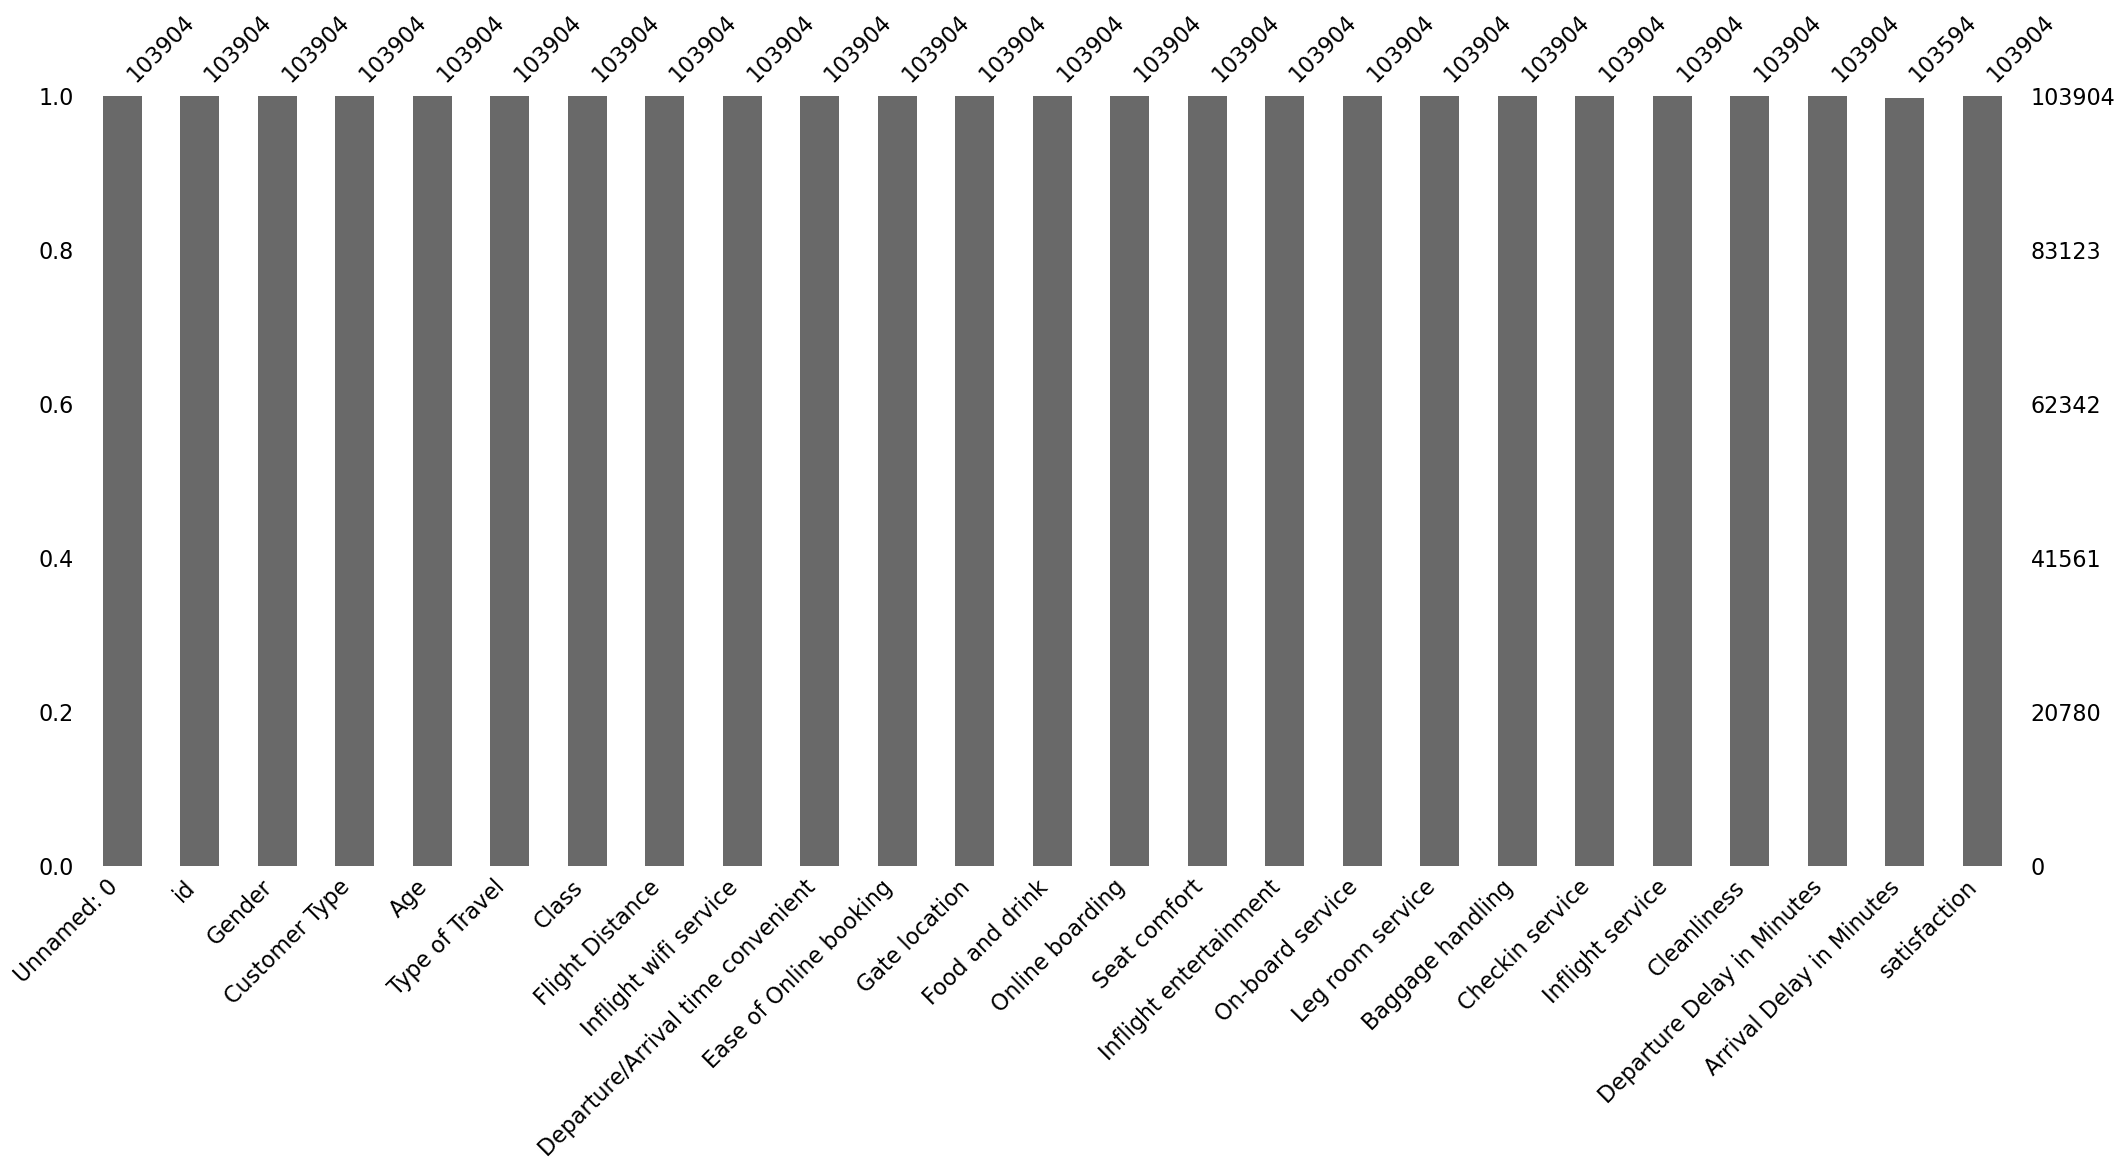

In [20]:
# missingno ile eksik veri bar grafiÄŸi

msno.bar(df)
plt.show()


### YorumlayalÄ±m: 

**GrafiÄŸe gÃ¶re eksik deÄŸerlerin gÃ¶rselleÅŸtirilmesi yer almaktadÄ±r. "Arrival Delay in Minutes" sÃ¼tununda eksik deÄŸer olduÄŸu gÃ¶rÃ¼lmektedir.**

**Eksik deÄŸer bulunan sÃ¼tunlarÄ±mÄ±z aÅŸaÄŸÄ±daki gibidir:**
- Arrival Delay in Minutes = 310 adet eksik verimiz bulunmaktadÄ±r.

In [21]:
# Her bir sÃ¼tun iÃ§in eksik oranÄ± nedir?

# Her sÃ¼tun iÃ§in eksik veri oranÄ± (satÄ±r sayÄ±sÄ±na gÃ¶re)
missing_ratio = df.isnull().sum() / len(df)

# YalnÄ±zca eksik verisi olan sÃ¼tunlarÄ± gÃ¶ster
missing_ratio = missing_ratio[missing_ratio > 0]

# SonuÃ§larÄ± yazdÄ±r
print("Oranlar")
print(missing_ratio.sort_values(ascending=False))

Oranlar
Arrival Delay in Minutes    0.002984
dtype: float64


**Eksik veri oran daÄŸÄ±lÄ±mlarÄ±nÄ± inceleyecek olursak:**
    
- Arrival Delay in Minutes = 0.2984 %

olarak sÃ¼tunlarÄ±mÄ±zda eksik deÄŸer daÄŸÄ±lÄ±mlarÄ±nÄ± incelemekteyiz.

**Eksik veri oranÄ± %70-%75 ve Ã¼zerinde olsaydÄ±, model kurarken sÄ±kÄ±ntÄ± Ã§Ä±karabilirdi. Bu sebeple veriden Ã§Ä±kartÄ±lmasÄ± gerekirdi.**

**Ancak burada eksik veri oranÄ±mÄ±z dÃ¼ÅŸÃ¼k olduÄŸundan kaynaklÄ± doldurma iÅŸlemi uygulanabilir.**


### Eksik verileri doldururken ÅŸu yaklaÅŸÄ±mlar kullanÄ±labilir:


### SimpleImputer vs. KNNImputer


ðŸ”¹ SimpleImputer (Basit Atama YÃ¶ntemi)
NasÄ±l Ã§alÄ±ÅŸÄ±r?
Eksik deÄŸerleri sabit bir istatistikle doldurur:

strategy="mean" â†’ ortalama ile doldurur

strategy="median" â†’ medyan ile doldurur

strategy="most_frequent" â†’ en sÄ±k gÃ¶rÃ¼len deÄŸer

strategy="constant" â†’ sabit bir deÄŸer (Ã¶rneÄŸin "Bilinmiyor")

âœ… KullanÄ±m alanÄ±:

SayÄ±sal (numeric) deÄŸiÅŸkenlerde: mean, median

Kategorik (object/string) deÄŸiÅŸkenlerde: most_frequent, constant

ðŸ“Œ AvantajÄ±: HÄ±zlÄ± ve basit
ðŸ“Œ DezavantajÄ±: Veri daÄŸÄ±lÄ±mÄ±nÄ± dikkate almaz


<br>

ðŸ”¹ KNNImputer (K-En YakÄ±n KomÅŸu ile Atama)
NasÄ±l Ã§alÄ±ÅŸÄ±r?

Eksik deÄŸerleri, benzer (komÅŸu) Ã¶rneklerin ortalamasÄ±na gÃ¶re tahmin eder.

k tane en yakÄ±n veri noktasÄ±nÄ± bulur (standart olarak k=5)

Bu komÅŸulara gÃ¶re eksik deÄŸerleri aÄŸÄ±rlÄ±klÄ± ortalama ile doldurur.

âœ… KullanÄ±m alanÄ±:

Sadece sayÄ±sal (numeric) deÄŸiÅŸkenlerde kullanÄ±lÄ±r!
Ã‡Ã¼nkÃ¼ mesafe (distance) hesaplamalarÄ± yapÄ±lÄ±r.

ðŸ“Œ AvantajÄ±: Veri yapÄ±sÄ±nÄ± korur, daha isabetli doldurma yapar
ðŸ“Œ DezavantajÄ±: Hesaplama maliyeti yÃ¼ksektir, kategorik verilere uygun deÄŸildir


<br>

ðŸŽ¯ Ã–zet KarÅŸÄ±laÅŸtÄ±rma Tablosu:

| Ã–zellik                  | SimpleImputer              | KNNImputer                        |
| ------------------------ | -------------------------- | --------------------------------- |
| Uygun Veri TÃ¼rÃ¼          | Numeric & Kategorik        | Sadece Numeric                    |
| Doldurma YÃ¶ntemi         | Ortalama, Medyan vb.       | KomÅŸularÄ±n ortalamasÄ±             |
| Hesaplama HÄ±zÄ±           | HÄ±zlÄ±                      | YavaÅŸ (Ã¶zellikle bÃ¼yÃ¼k veri iÃ§in) |
| AykÄ±rÄ± DeÄŸere DuyarlÄ±lÄ±k | YÃ¼ksek (mean kullanÄ±lÄ±rsa) | DÃ¼ÅŸÃ¼k / daha esnektir             |
| Veri yapÄ±sÄ±nÄ± koruma     | DÃ¼ÅŸÃ¼k                      | YÃ¼ksek                            |


<br>

âœ… Ne zaman hangisi tercih edilmelidir?

Kategorik deÄŸiÅŸkenler iÃ§in: SimpleImputer(strategy="most_frequent")

SayÄ±sal verilerde kÃ¼Ã§Ã¼k veri setlerinde daha doÄŸru tahmin isteniyorsa: KNNImputer

SayÄ±sal verilerde basit ve hÄ±zlÄ± Ã§Ã¶zÃ¼m isteniyorsa: SimpleImputer





### SayÄ±sal deÄŸiÅŸkenleri SimpleImputer ile dolduralÄ±m.

**SayÄ±sal deÄŸiÅŸkenleri doldururken mean veya mediana gÃ¶re doldurma iÅŸlemleri gerÃ§ekleÅŸtirilmelidir. Skewness deÄŸeri gÃ¶z Ã¶nÃ¼ne alÄ±narak doldurma iÅŸlemi gerÃ§ekleÅŸtirilecektir.**

**Skewness DeÄŸeri:**

**> 0 : SaÄŸa Ã‡arpÄ±k**

**< 0 : Sola Ã‡arpÄ±k**

**= 0 : Simetik DaÄŸÄ±lÄ±m**

sÃ¶z konusudur.

In [22]:
# SayÄ±sal olup eksik deÄŸer bulunan Arrival Delay in Minutes deÄŸeri iÃ§in Ã§arpÄ±klÄ±k deÄŸerlerini inceleyelim.

print("Ã‡arpÄ±klÄ±k:", df['Arrival Delay in Minutes'].skew())


Ã‡arpÄ±klÄ±k: 6.596636807462696


**YukarÄ±daki Ã§arpÄ±klÄ±k sonuÃ§larÄ±na gÃ¶re median ile doldurmak daha saÄŸlÄ±klÄ± olacaktÄ±r.**

**Verimiz normal daÄŸÄ±lÄ±m gÃ¶sterirse mean ile doldurulur. Ancak saÄŸa veya sola Ã§arpÄ±k olursa median ile doldurulur.**

In [23]:
# SimpleImputer ile ortalama doldurma
from sklearn.impute import SimpleImputer


imp_median = SimpleImputer(strategy="median")
df[["Arrival Delay in Minutes"]] = imp_median.fit_transform(df[["Arrival Delay in Minutes"]])


In [24]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

#### YukarÄ±daki sonuÃ§lara gÃ¶re tÃ¼m eksik deÄŸerler doldurulmuÅŸtur.

Bu verisetinde kategorik deÄŸiÅŸkenlerde eksik veri bulunmamaktadÄ±r. EÄŸer ki kategorik deÄŸiÅŸkenlerde eksik deÄŸeri doldurma iÅŸlemi yapsaydÄ±k en sÄ±k tekrar eden deÄŸer yani mode ile doldurma iÅŸlemi gerÃ§ekleÅŸtirirdik.

Mode, bir sayÄ± kÃ¼mesinde en sÄ±k gÃ¶rÃ¼len deÄŸer iÃ§in kullanÄ±lan istatistiksel bir terimdir.



### **4. AykÄ±rÄ± DeÄŸer (Outlier) Analizi SayÄ±sal deÄŸiÅŸkenler Ã¼zerinde aykÄ±rÄ± deÄŸerler belirlenir ve gÃ¶rsel/istatistiksel yÃ¶ntemlerle raporlanÄ±r.**

#### AykÄ±rÄ± deÄŸerler 2 ÅŸekilde belirleyebiliriz:

- 4.1. Boxplot ile AykÄ±rÄ± DeÄŸer Analizi
- 4.2. IQR YÃ¶ntemiyle AykÄ±rÄ± DeÄŸer Analizi

gerÃ§ekleÅŸtirilebilir. 

Bu notebookta Boxplot ile AykÄ±rÄ± DeÄŸer Analizi gerÃ§ekleÅŸtirilmiÅŸtir.

#### 4.1.Boxplot ile AykÄ±rÄ± DeÄŸer Analizi

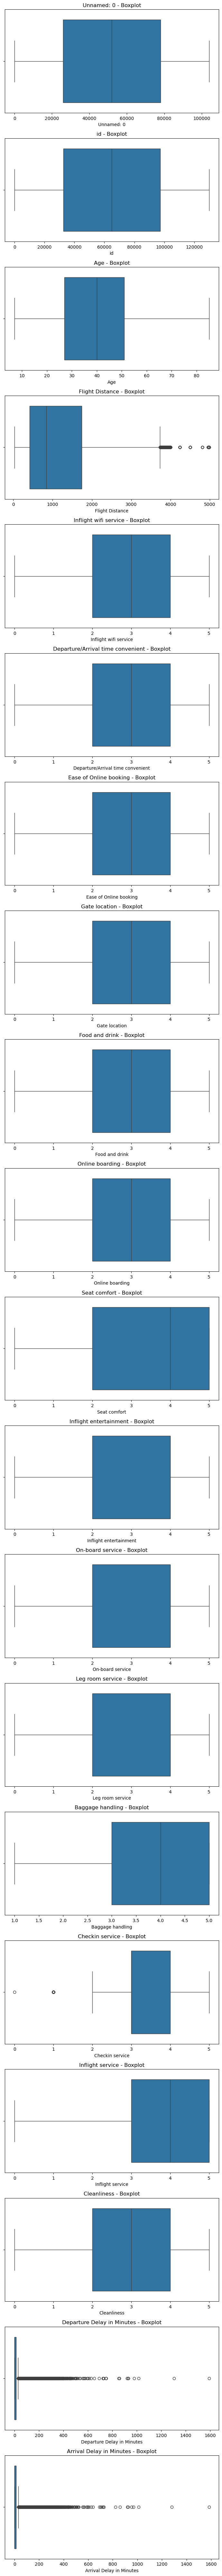

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

n = len(num_cols)
fig, axes = plt.subplots(nrows=n, figsize=(7, 4*n))

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"{col} - Boxplot")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


### Boxplot YorumlayalÄ±m:

- **Unnamed:0 DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 100000(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 25000 civarÄ±nda,  Q2 = 52000(median) civarÄ±nda, Q3 = 78000 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmamaktadÄ±r.
  
- **id DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 130000(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 32000 civarÄ±nda,  Q2 = 64000(median) civarÄ±nda, Q3 = 95000 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmamaktadÄ±r.

- **Age DaÄŸÄ±lÄ±mÄ±:**
  - 7 (Min) ile 85(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 27 civarÄ±nda,  Q2 = 40(median) civarÄ±nda, Q3 = 52 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmamaktadÄ±r.

- **Flight Distance DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 3700(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 400 civarÄ±nda,  Q2 = 800(median) civarÄ±nda, Q3 = 1800 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmaktadÄ±r. 3700 Ã¼zerinde aykÄ±rÄ± deÄŸerler olduÄŸu gÃ¶rÃ¼nmektedir.

- **Inflight wifi services DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 5(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 2 civarÄ±nda,  Q2 = 3(median) civarÄ±nda, Q3 = 4 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmamaktadÄ±r.

- **Departure/Arrival time convenient DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 5(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 2 civarÄ±nda,  Q2 = 3(median) civarÄ±nda, Q3 = 4 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmamaktadÄ±r.

- **Ease of Online booking DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 5(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 2 civarÄ±nda,  Q2 = 3(median) civarÄ±nda, Q3 = 4 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmamaktadÄ±r.

- **Gate location DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 5(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 2 civarÄ±nda,  Q2 = 3(median) civarÄ±nda, Q3 = 4 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmamaktadÄ±r.

- **Food and drink DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 5(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 2 civarÄ±nda,  Q2 = 3(median) civarÄ±nda, Q3 = 4 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmamaktadÄ±r.
  
- **Online boarding DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 5(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 2 civarÄ±nda,  Q2 = 3(median) civarÄ±nda, Q3 = 4 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmamaktadÄ±r.

- **Seat comfort DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 5(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 2 civarÄ±nda,  Q2 = 4(median) civarÄ±nda, Q3 = 5 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmamaktadÄ±r.
  
- **Inflight entertainment DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 5(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 2 civarÄ±nda,  Q2 = 4(median) civarÄ±nda, Q3 = 4 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmamaktadÄ±r.
  
- **On-board service DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 5(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 2 civarÄ±nda,  Q2 = 4(median) civarÄ±nda, Q3 = 4 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmamaktadÄ±r.

- **Leg room service DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 5(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 2 civarÄ±nda,  Q2 = 4(median) civarÄ±nda, Q3 = 4 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmamaktadÄ±r.

- **Baggeage handling DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 5(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 2 civarÄ±nda,  Q2 = 4(median) civarÄ±nda, Q3 = 5 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmamaktadÄ±r.
  
- **Checkin service DaÄŸÄ±lÄ±mÄ±:**
  - 2 (Min) ile 5(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 3 civarÄ±nda,  Q2 = 3 (median) civarÄ±nda, Q3 = 4 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmaktadÄ±r. 0 ve 2 arasÄ±nda daÄŸÄ±lÄ±m gÃ¶steriyor.

- **Inflight service DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 5(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 3 civarÄ±nda,  Q2 = 4 (median) civarÄ±nda, Q3 = 5 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmamaktadÄ±r.

- **Cleanliness DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 5(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 2 civarÄ±nda,  Q2 = 3 (median) civarÄ±nda, Q3 = 4 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmamaktadÄ±r.

- **Departure Delay in Minutes DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 30(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 0 civarÄ±nda,  Q2 = 0 (median) civarÄ±nda, Q3 = 12 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmaktadÄ±r. 35 ve 1600 arasÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.


- **Arrival Delay in Minutes DaÄŸÄ±lÄ±mÄ±:**
  - 0 (Min) ile 30(Max) arasÄ±nda daÄŸÄ±lÄ±m gÃ¶sterdiÄŸi gÃ¶rÃ¼lmektedir.
  - Q1 = 0 civarÄ±nda,  Q2 = 0 (median) civarÄ±nda, Q3 = 13 civarÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.
  - AykÄ±rÄ± deÄŸer bulunmaktadÄ±r. 35 ve 1600 arasÄ±nda olduÄŸu gÃ¶rÃ¼lmektedir.


#### 4.2. IQR YÃ¶ntemiyle AykÄ±rÄ± DeÄŸer Analizi

In [26]:
# AykÄ±rÄ± deÄŸerleri tutmak iÃ§in bir sÃ¶zlÃ¼k
outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)            # Q1 hesaplama
    Q3 = df[col].quantile(0.75)            # Q3 hesaplama 
    IQR = Q3 - Q1                          # IQR deÄŸerini bulalÄ±m
    lower_bound = Q1 - 1.5 * IQR            # Alt sÄ±nÄ±r ve Ã¼st sÄ±nÄ±r deÄŸerlerini bulalÄ±m
    upper_bound = Q3 + 1.5 * IQR

    # AykÄ±rÄ± deÄŸerleri filtrele
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)]            # aykÄ±rÄ± deÄŸerleri tespit edelim

    # EÄŸer aykÄ±rÄ± deÄŸer varsa
    if not outlier_values.empty:                          # eÄŸerki outlier deÄŸerleri boÅŸ deÄŸilse, bunlarÄ± bir listeye ekleyelim
        outliers[col] = outlier_values.index.tolist() 
        print(f"{col} sÃ¼tunundaki aykÄ±rÄ± deÄŸerler:")
        print(outlier_values[[col]])
        print("-" * 50)

Flight Distance sÃ¼tunundaki aykÄ±rÄ± deÄŸerler:
        Flight Distance
80                 3960
173                3747
201                3854
215                3753
379                3995
...                 ...
103565             3881
103648             3890
103727             3990
103865             3795
103889             3885

[2291 rows x 1 columns]
--------------------------------------------------
Checkin service sÃ¼tunundaki aykÄ±rÄ± deÄŸerler:
        Checkin service
1                     1
3                     1
15                    1
30                    1
34                    1
...                 ...
103869                1
103887                1
103892                1
103893                1
103896                1

[12891 rows x 1 columns]
--------------------------------------------------
Departure Delay in Minutes sÃ¼tunundaki aykÄ±rÄ± deÄŸerler:
        Departure Delay in Minutes
14                              43
16                              49
22      

**IQR YorumlayalÄ±m:**

- **Flight Distance deÄŸeri:**
    - Flight Distance sÃ¼tununda 2291 sÃ¼tun deÄŸeri aykÄ±rÄ± deÄŸer olarak belirlenmiÅŸtir.
- **Checkin service deÄŸeri:**
    - Checkin service sÃ¼tununda 12891 sÃ¼tun deÄŸeri aykÄ±rÄ± deÄŸer olarak belirlenmiÅŸtir.
- **Departure Delay in Minutes deÄŸeri:**
    - Departure Delay in Minutes sÃ¼tununda 14529 sÃ¼tun deÄŸeri aykÄ±rÄ± deÄŸer olarak belirlenmiÅŸtir.
- **Arrival Delay in Minutes deÄŸeri:**
    - Arrival Delay in Minutes sÃ¼tununda 13954 sÃ¼tun deÄŸeri aykÄ±rÄ± deÄŸer olarak belirlenmiÅŸtir.
    
**YukarÄ±da gÃ¶sterimine yer verdiÄŸimiz aykÄ±rÄ± deÄŸerler ya veriden Ã§Ä±karÄ±lacaktÄ±r ya da Winsorizing yÃ¶ntemiyle aykÄ±rÄ± deÄŸerleri baskÄ±lama yÃ¶ntemi uygulanabilir.**

### **5. GÃ¶rselleÅŸtirme SayÄ±sal ve kategorik deÄŸiÅŸkenler iÃ§in uygun grafik tÃ¼rleri kullanÄ±larak veriler gÃ¶rselleÅŸtirilir.**

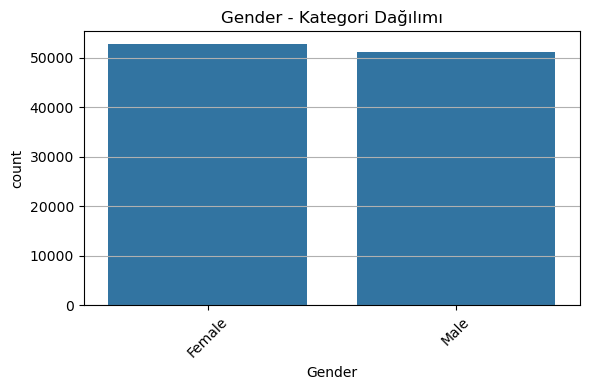

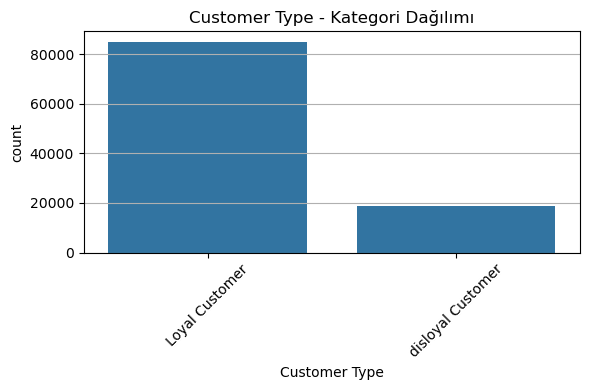

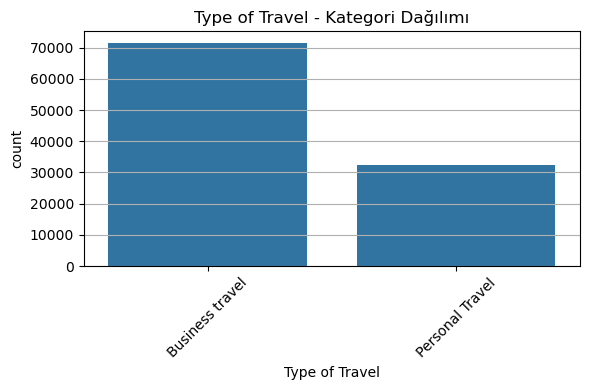

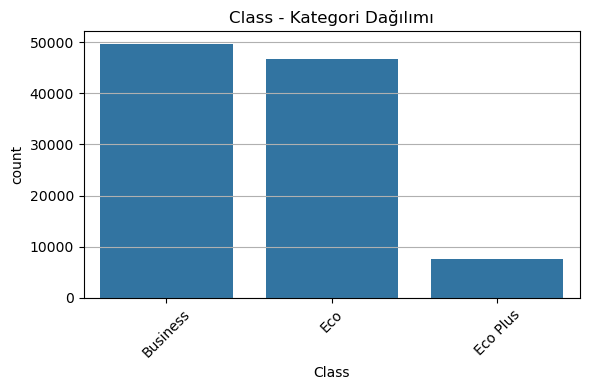

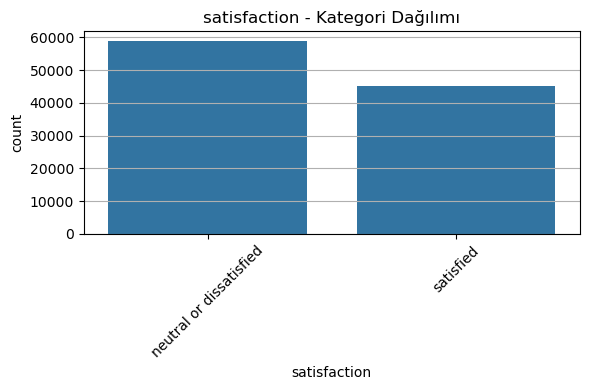

In [47]:
# Kategorik deÄŸiÅŸkenler iÃ§in gÃ¶rselleÅŸtirme yapalÄ±m.

for col in cat_cols:
    plt.figure(figsize=(6, 4))                                        # boyutlarÄ±nÄ± verelim.
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)   
    plt.title(f"{col} - Kategori DaÄŸÄ±lÄ±mÄ±")                            # baÅŸlÄ±k verir.
    plt.xticks(rotation=45)                                            # x eksenindekilere 45 derece rotasyon verelim.
    plt.grid(axis="y")                                                 # arkadaki Ä±zgaralarÄ± ekler.
    plt.tight_layout()                                                
    plt.show()

#### Kategorik deÄŸiÅŸkenler iÃ§in yorumlama:
- Gender DaÄŸÄ±lÄ±mÄ±'nda neredeydse eÅŸit bir daÄŸÄ±lÄ±m olduÄŸunu gÃ¶rmekteyiz.
- Customer Type DaÄŸÄ±lÄ±mÄ±'nda SadÄ±k olanlarÄ±n sayÄ±sÄ±nÄ±n bir hayli fazla olduÄŸu gÃ¶rÃ¼lmekte. EÅŸit bir daÄŸÄ±lÄ±m sÃ¶z konusu deÄŸildir.
- Type of Travel DaÄŸÄ±lÄ±mÄ±'nda Ä°ÅŸ iÃ§in seyahat edenler, kiÅŸisel seyahatlere gÃ¶re 2 katÄ± daha fazladÄ±r. EÅŸit bir daÄŸÄ±lÄ±m sÃ¶z konusu deÄŸildir.
- Class DaÄŸÄ±lÄ±mÄ±'nda Business bÃ¶lÃ¼mÃ¼nde seyahat edenler en fazladÄ±r. ArdÄ±ndan onu Eco takip etmektedir, Eco Plus en az tercih edilen sÄ±nÄ±ftÄ±r.
- satisfaticon DaÄŸÄ±lÄ±mÄ±'nda nÃ¶tr veya memnun olamayanlarÄ±n sayÄ±sÄ±, memnun olanlardan fazladÄ±r.


Text(0.5, 1.0, 'Memnuniyet DaÄŸÄ±lÄ±mÄ±')

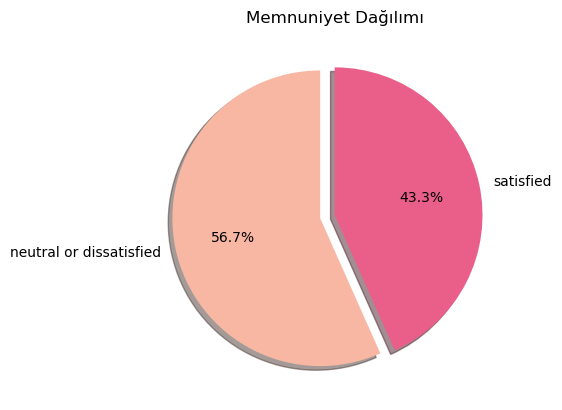

In [58]:
# Pie Chart ile memnuniyet daÄŸÄ±lÄ±mÄ±nÄ± inceleyelim.

plt.pie(df['satisfaction'].value_counts(),labels=df['satisfaction'].value_counts().index,autopct='%1.1f%%',colors=c,startangle=90,explode=[0.1,0],shadow=True)


plt.title('Memnuniyet DaÄŸÄ±lÄ±mÄ±')      # baÅŸlÄ±k veriyoruz.

#### Memnuniyet DaÄŸÄ±lÄ±mÄ± grafiÄŸini yorumlayalÄ±m:

Bu grafik bize verideki genel memnun olanlar ve nÃ¶tr veya memnun olmayanlarÄ±n daÄŸÄ±lÄ±mÄ±nÄ± vermektedir.

- %56.7 = nÃ¶tr veya memnun olmayanlar
- %43.3 = memnun olanlarÄ±n daÄŸÄ±lÄ±mÄ±nÄ± vermektedir.

Burada eÅŸit bir daÄŸÄ±lÄ±m sÃ¶z konusu deÄŸildir. Makine Ã¶ÄŸrenmesi modeli kurarken bu aradaki dengesizlik giderilmesi adÄ±na dengeleme teknikleri kullanÄ±labilir.

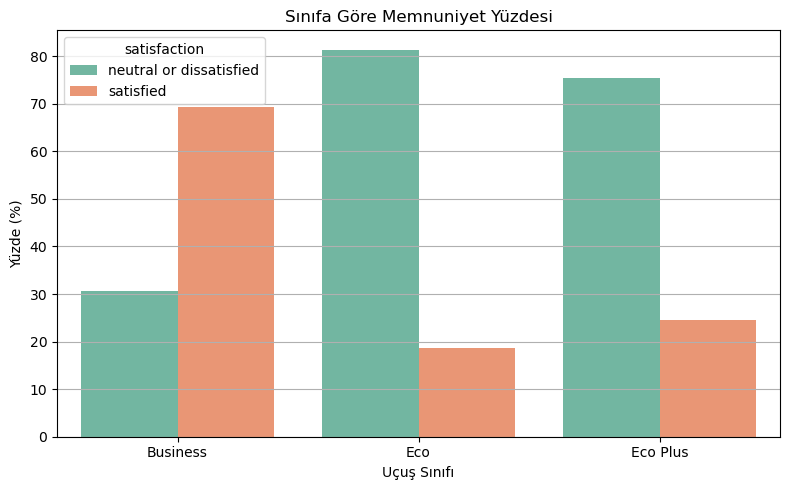

In [54]:
# SÄ±nÄ±f'a gÃ¶re memnuniyet yÃ¼zdesine bakalÄ±m.

grouped = df.groupby(["Class", "satisfaction"]).size().reset_index(name="count")
grouped["percent"] = grouped.groupby("Class")["count"].transform(lambda x: 100 * x / x.sum())

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x="Class", y="percent", hue="satisfaction", palette="Set2")
plt.title("SÄ±nÄ±fa GÃ¶re Memnuniyet YÃ¼zdesi")
plt.ylabel("YÃ¼zde (%)")
plt.xlabel("UÃ§uÅŸ SÄ±nÄ±fÄ±")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


#### SÄ±nÄ±fa GÃ¶re Memnuniye YÃ¼zdesi grafiÄŸini yorumlayalÄ±m:

- En Ã§ok memnun sÄ±nÄ±f : Business (yaklaÅŸÄ±k %70 oranÄ±nda)
- En az memnun sÄ±nÄ±f : Eco (yaklaÅŸÄ±k %82 oranÄ±nda) ve arkasÄ±ndan onu Eco Plus (yaklasÄ±k %75 oranÄ±nda) sÄ±nÄ±fÄ± takip etmektedir.

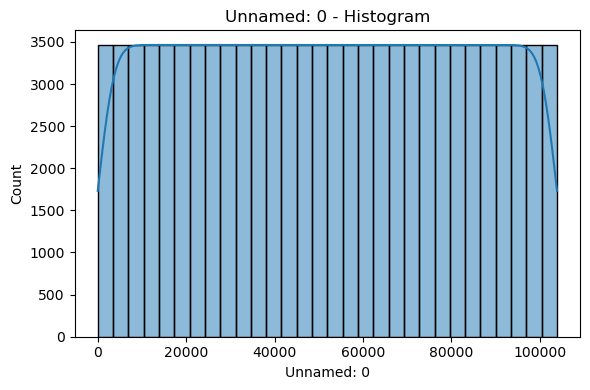

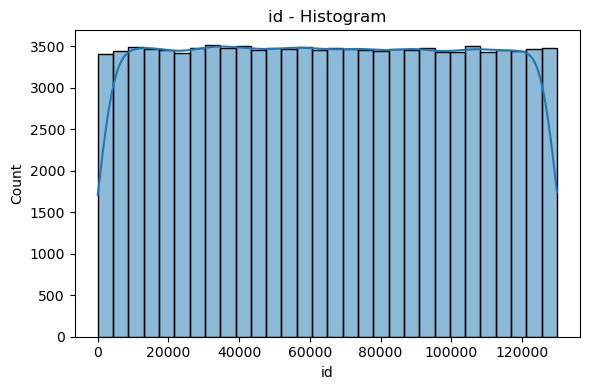

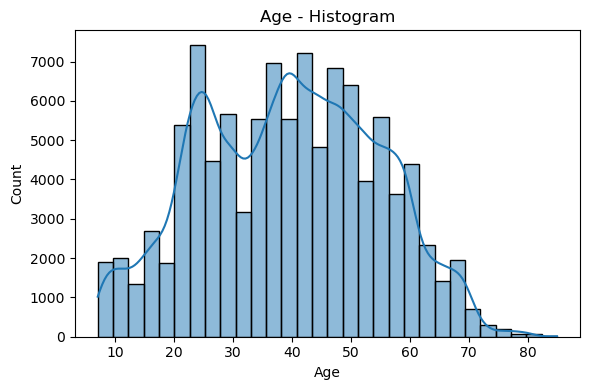

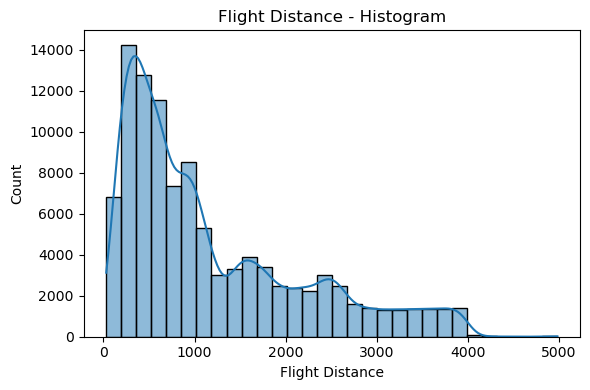

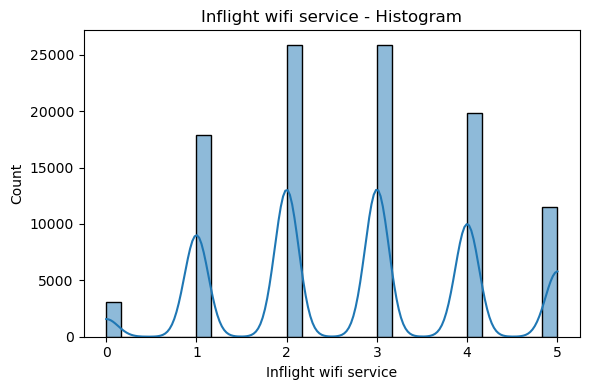

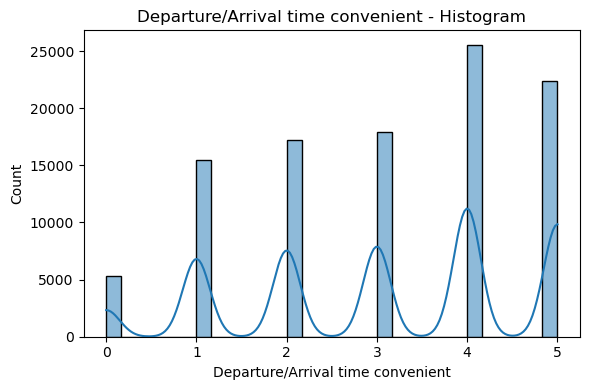

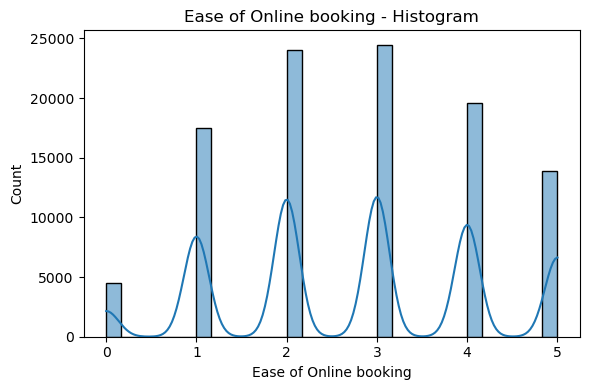

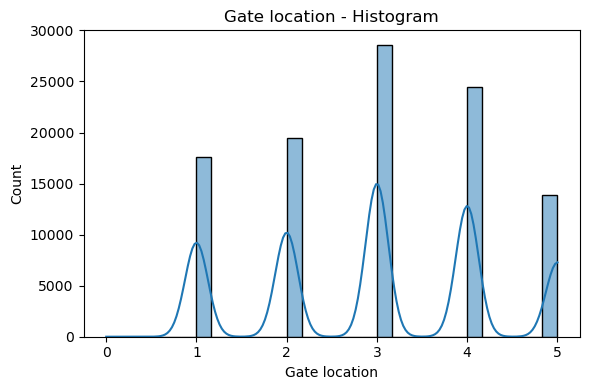

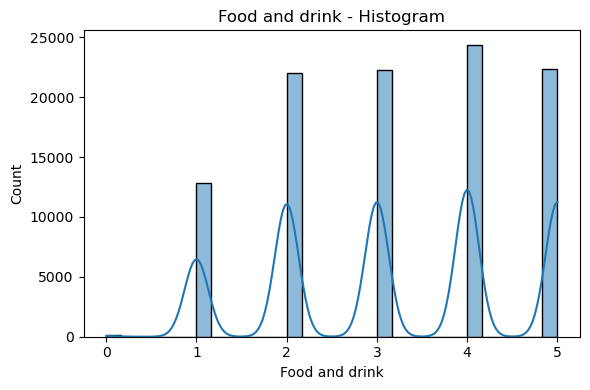

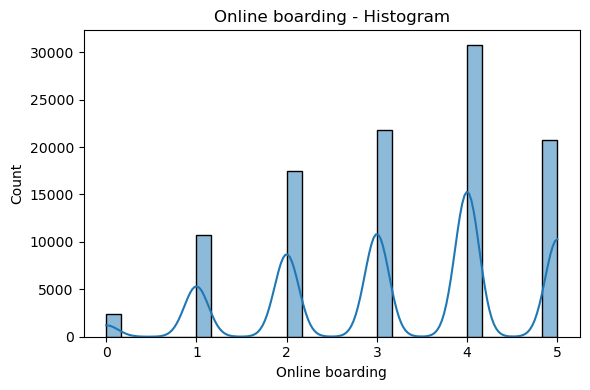

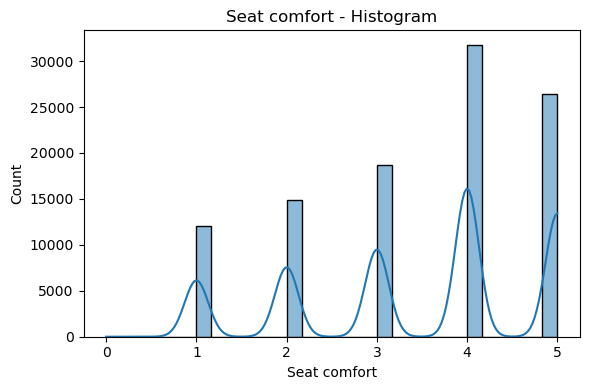

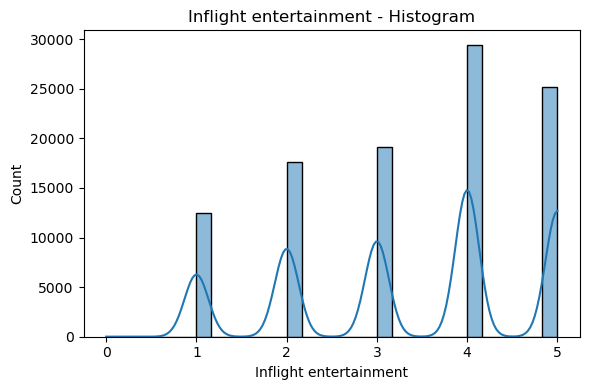

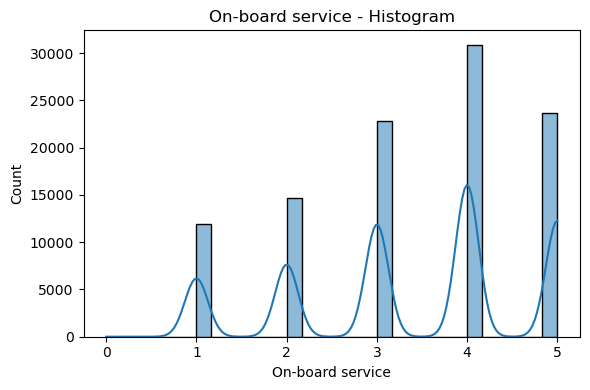

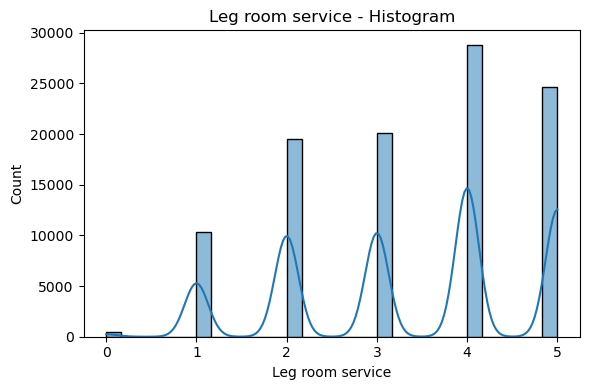

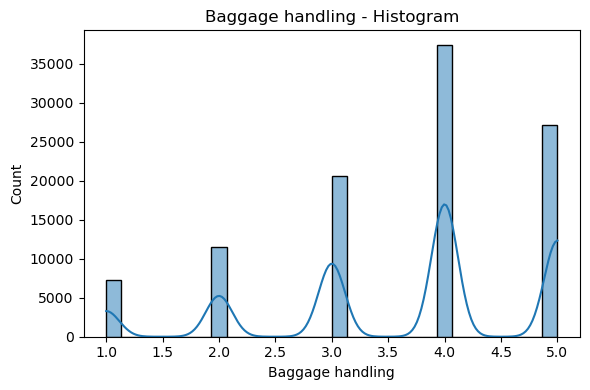

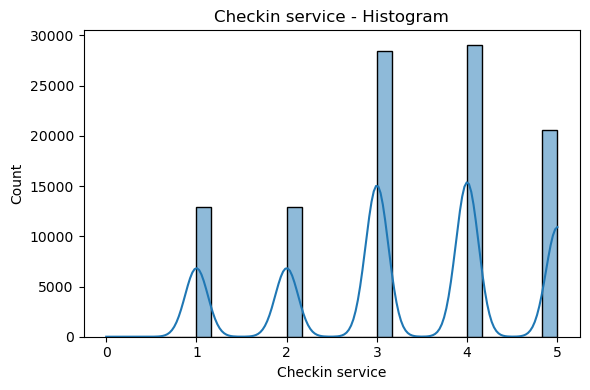

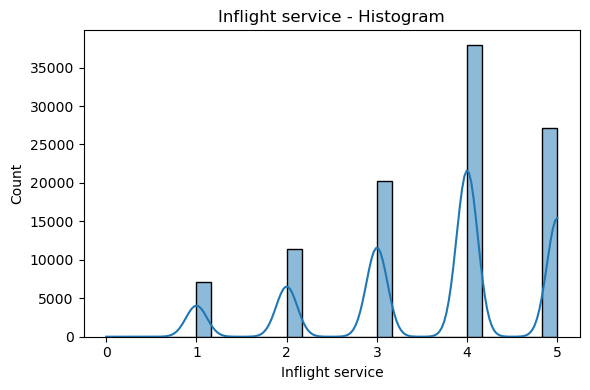

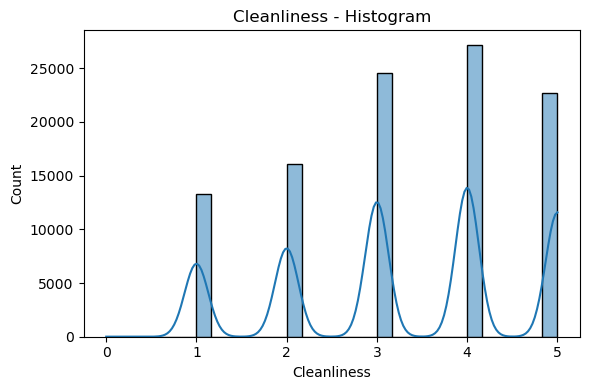

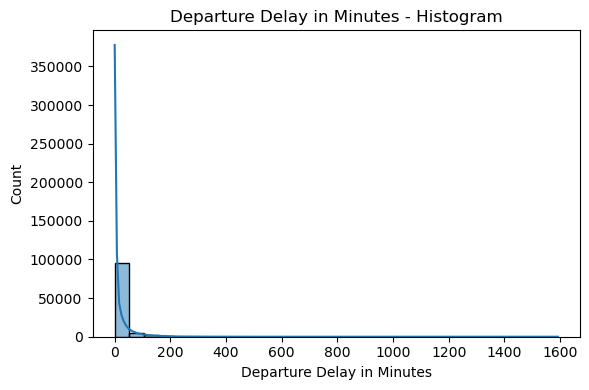

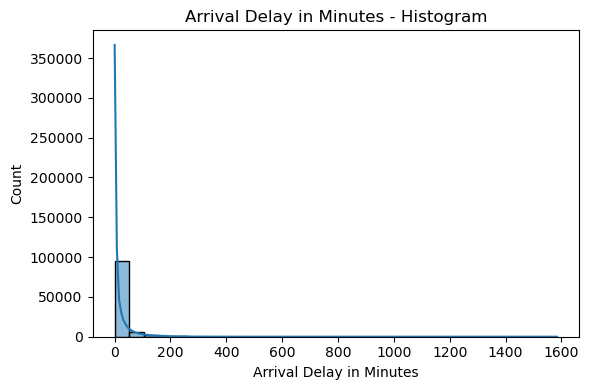

In [30]:
# numeric sÃ¼tunlarÄ±n gÃ¶rselleÅŸtirilmesi - Histplot

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f"{col} - Histogram")
    plt.tight_layout()
    plt.show()


#### Numeric sÃ¼tunlarÄ± YorumlayalÄ±m:

- Age sÃ¼tununda neredeyse Simetrik bir daÄŸÄ±lÄ±m sÃ¶z konusudur.
- Flight Distance, Departure Delay in Minutes ve Arrival Delay in Minutes sÃ¼tunlarÄ±nda saÄŸa Ã§arpÄ±k bir daÄŸÄ±lÄ±m sÃ¶z konusudur. Ve aykÄ±rÄ± deÄŸerler bulunmaktadÄ±r.
- DiÄŸer tÃ¼m sÃ¼tunlar iÃ§in simetrik daÄŸÄ±lÄ±m sÃ¶z konusudur.

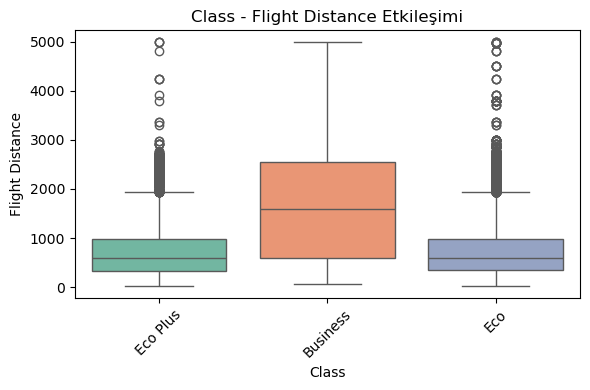

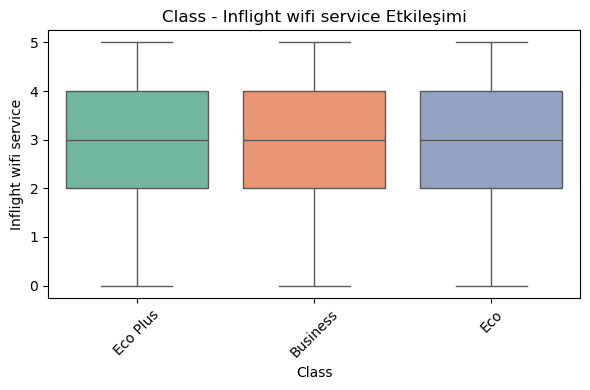

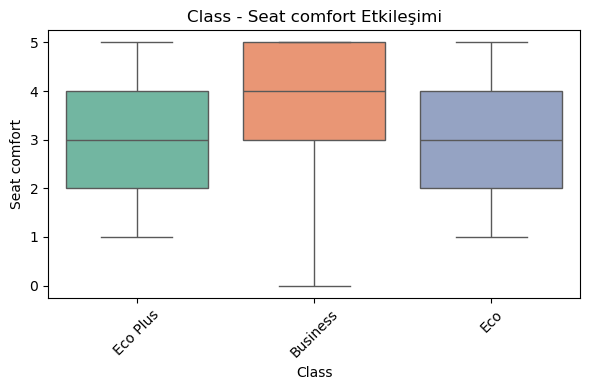

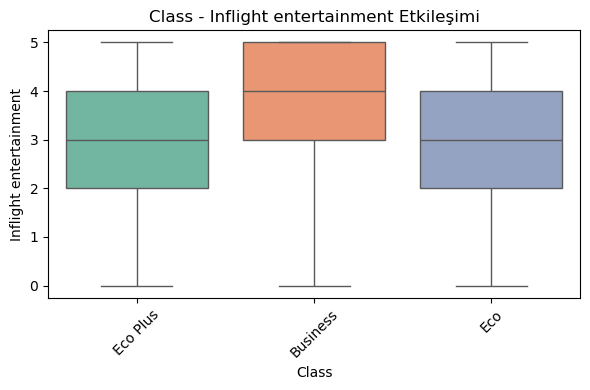

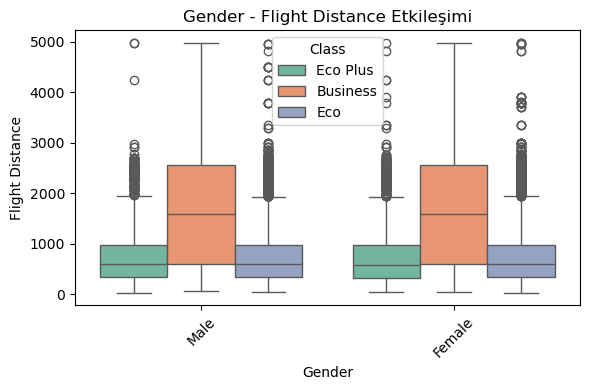

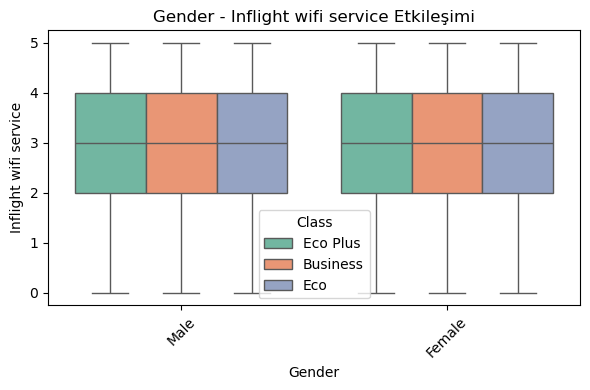

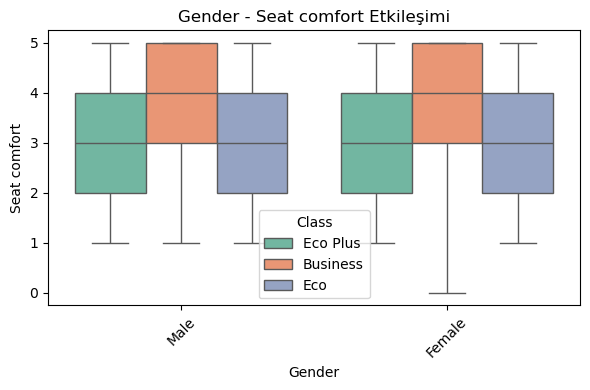

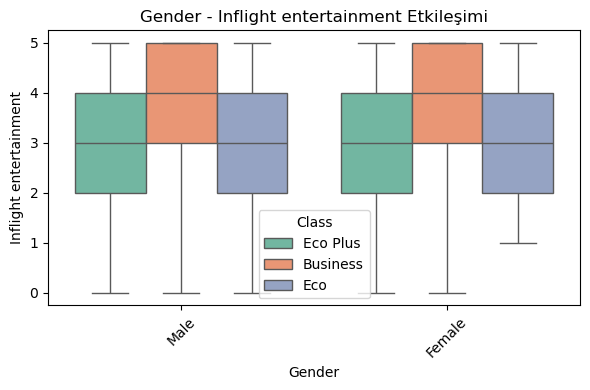

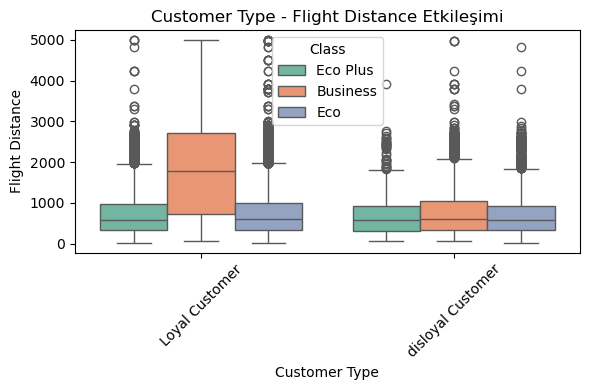

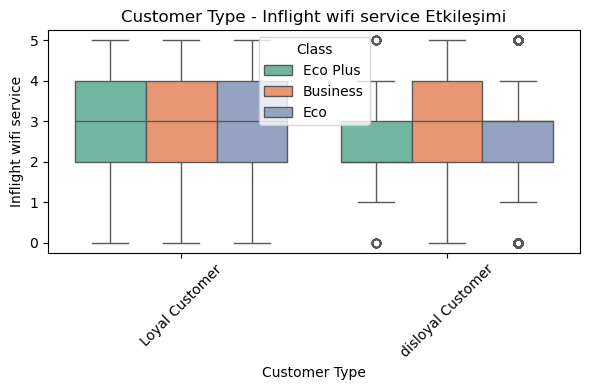

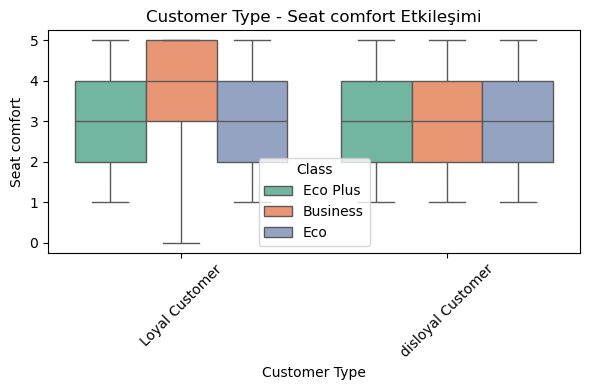

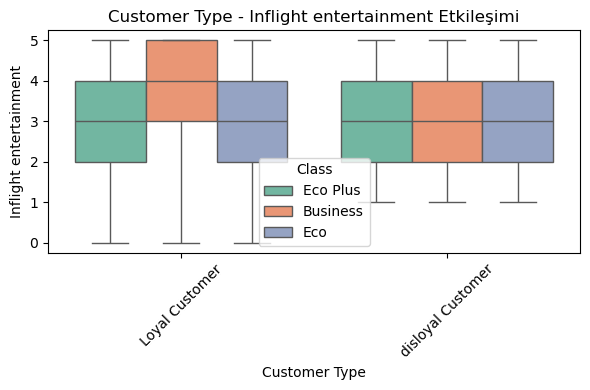

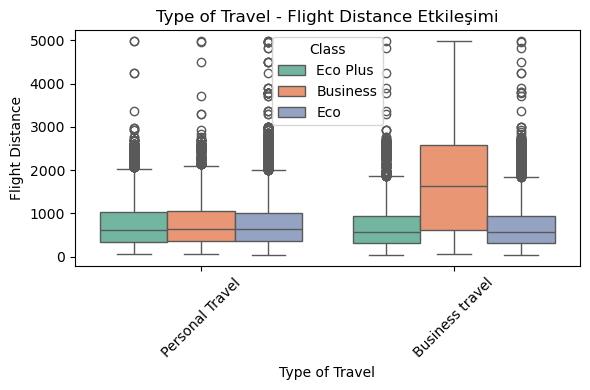

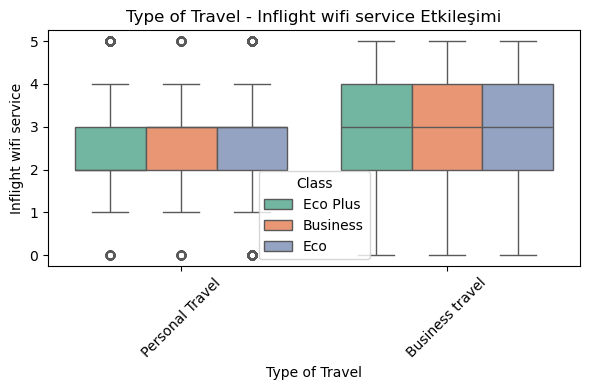

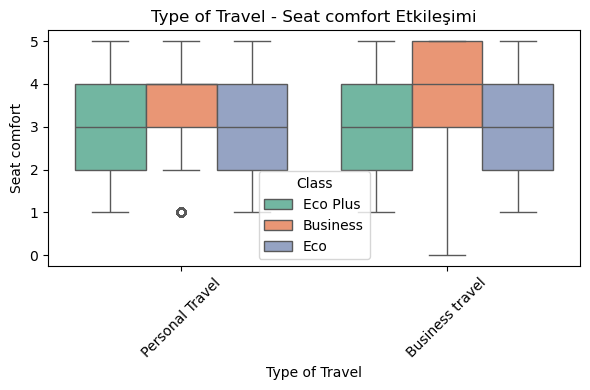

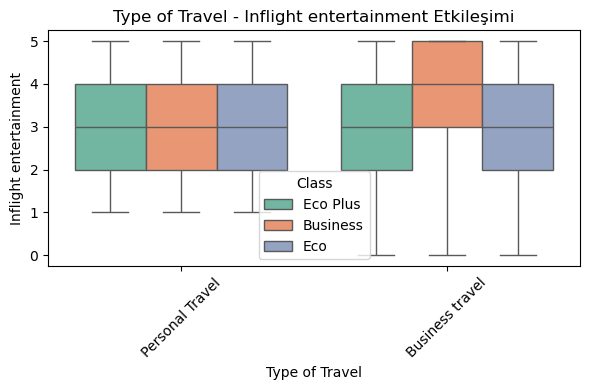

In [50]:
# Kategorik & SayÄ±sal EtkileÅŸim (Gruplu Boxplot)

for cat in ['Class', 'Gender', 'Customer Type', 'Type of Travel']:
    for num in ['Flight Distance', 'Inflight wifi service', 'Seat comfort', 'Inflight entertainment']:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, hue=df["Class"], x=cat, y=num, palette="Set2")
        plt.title(f"{cat} - {num} EtkileÅŸimi")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


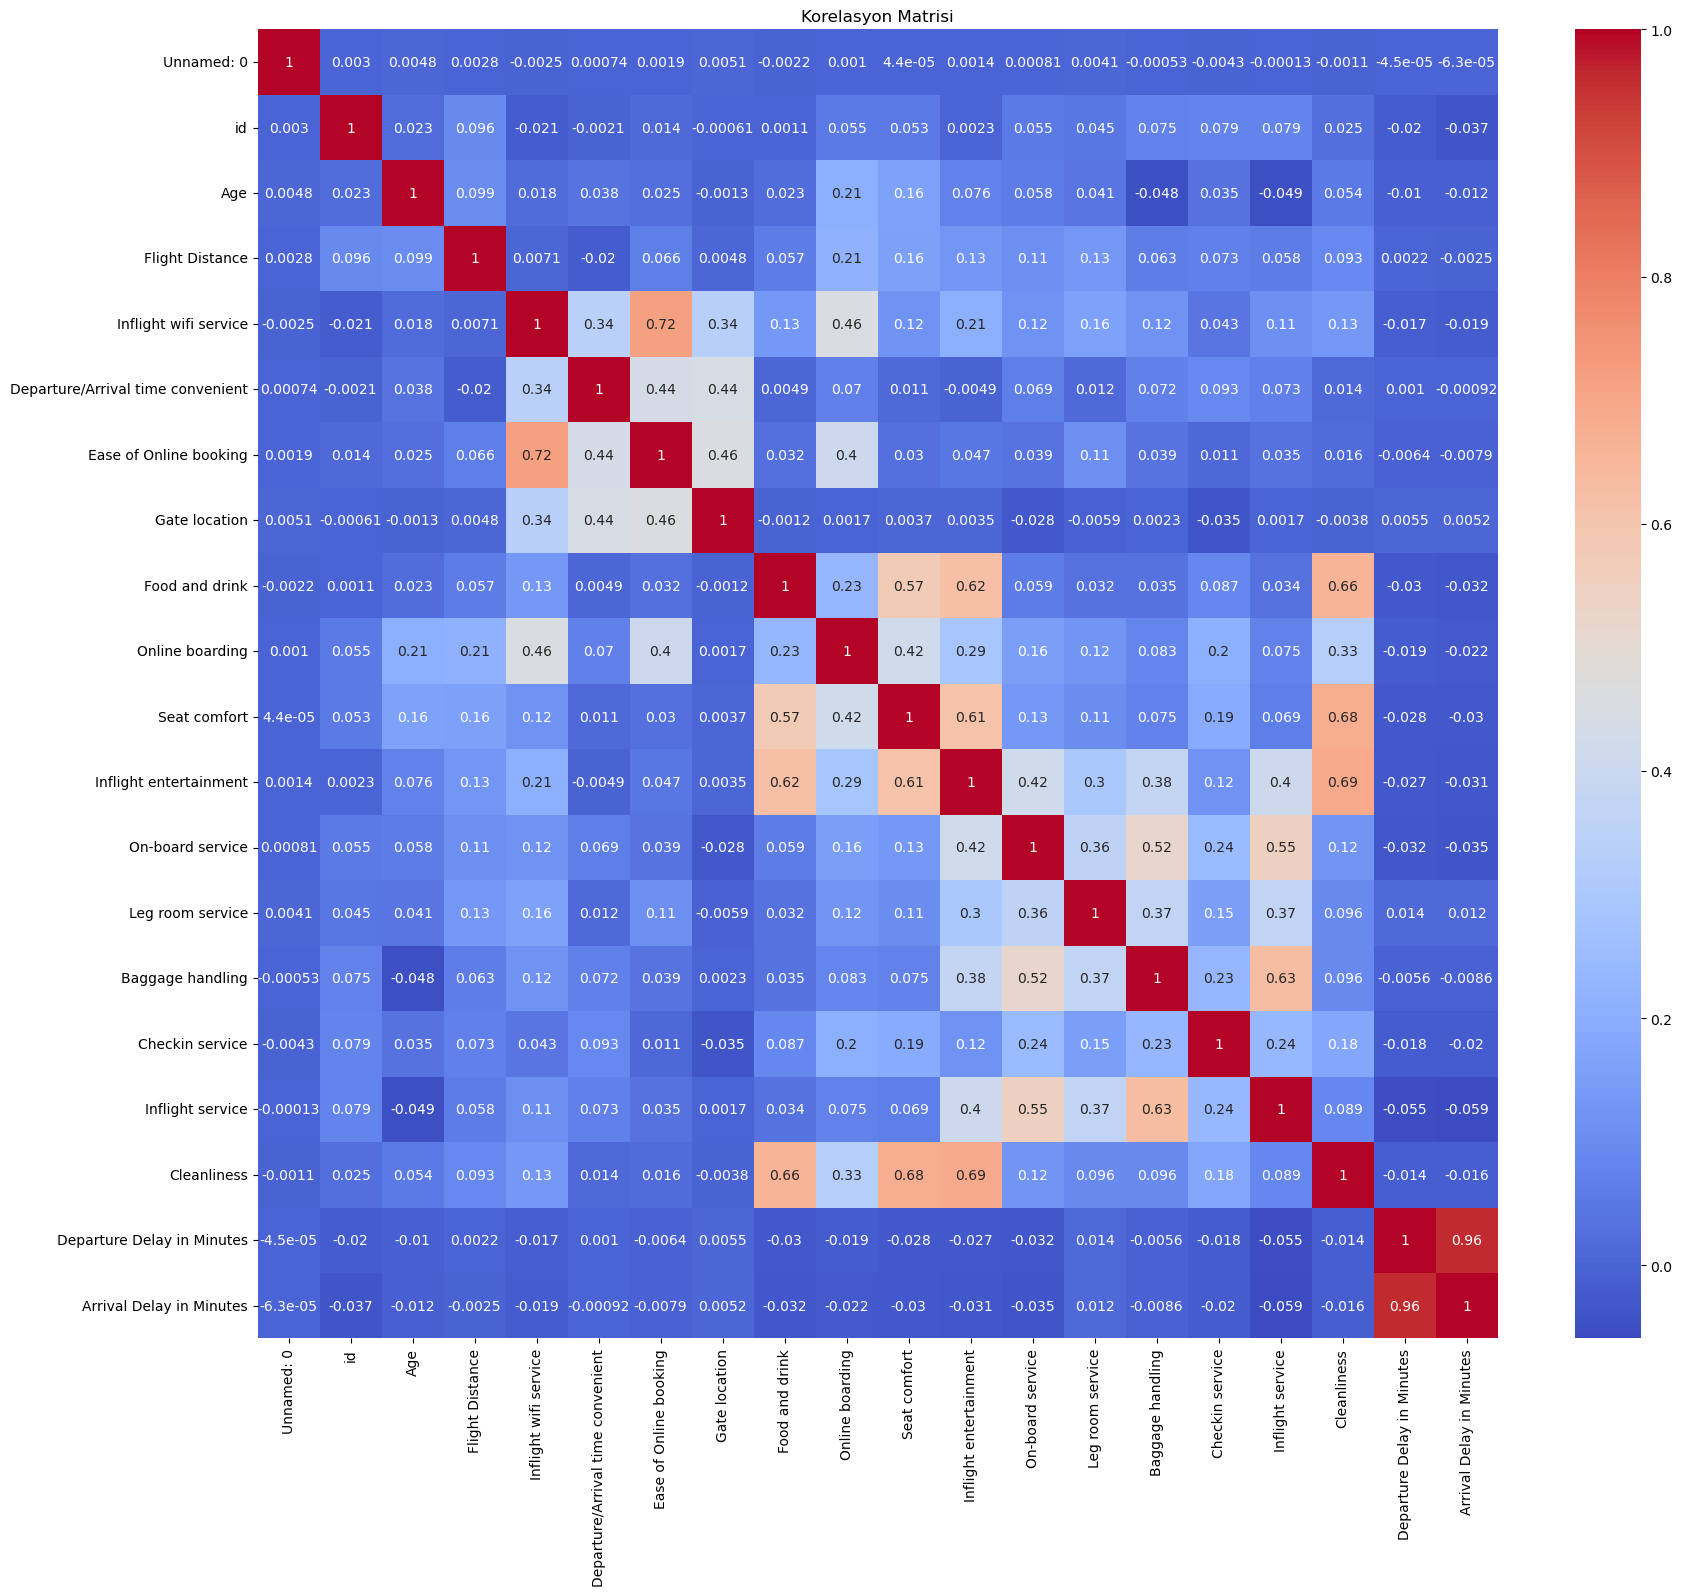

In [53]:
# Korelasyon Matrisi ile deÄŸiÅŸkenlerin arasÄ±ndaki iliÅŸkileri yorumlayalÄ±m

corr = df.corr(numeric_only=True)
plt.figure(figsize=(20, 17))  
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

#### Korelasyon YorumlayalÄ±m:
- **AralarÄ±nda Pozitif korelasyon bulunan deÄŸiÅŸkenler aÅŸaÄŸÄ±daki gibidir.**
    - Ease of Online booking - Inflight wifi services (+0.72)
    - Seat comfort - Food and drink (+0.57)
    - Inflight entertainment - Food and drink (+0.62)
    - Cleanliness - Food and drink (+0.66)
    - Inflight entertainment - Seat comfort (+0.61)
    - Cleanliness - Seat comfort(+0.68)
    - Cleanliness - Inflight entertainment (+0.69)
    - Baggage handling - On-based service (+0.52)
    - Inflight service - On-based service (+0.55)
    - Inflight service - Baggage handling (+0.63)

### **6. Teslim FormatÄ±**
- GitHub: KatÄ±lÄ±mcÄ±lar Ã§alÄ±ÅŸmalarÄ±nÄ± kendi GitHub hesaplarÄ± Ã¼zerinden private olarak paylaÅŸÄ±p deadline sonrasÄ± public hale getirebilirler. GitHub linklerini cohort Ã¼zerinden ilgili yere paylaÅŸmalarÄ± beklenir.
- Classroom Assignment: TÃ¼m katÄ±lÄ±mcÄ±lar Ã§alÄ±ÅŸmalarÄ±nÄ± Classroom Ã¼zerinden teslim eder.